In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings

In [7]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df= pd.read_csv('/content/TCS.NS.csv')

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-22,2661.000000,2686.649902,2638.100098,2671.149902,2606.325439,5262294
1,2020-10-23,2687.800049,2702.000000,2670.100098,2686.800049,2621.595703,3499091
2,2020-10-26,2689.949951,2709.949951,2670.500000,2688.199951,2622.961914,2672752
3,2020-10-27,2699.750000,2718.149902,2624.100098,2630.149902,2566.320313,3537502
4,2020-10-28,2650.000000,2655.949951,2606.000000,2622.199951,2558.563477,3569445
...,...,...,...,...,...,...,...
492,2022-10-17,3072.649902,3128.399902,3071.449951,3111.750000,3111.750000,1517005
493,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722
494,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289
495,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       497 non-null    object 
 1   Open       497 non-null    float64
 2   High       497 non-null    float64
 3   Low        497 non-null    float64
 4   Close      497 non-null    float64
 5   Adj Close  497 non-null    float64
 6   Volume     497 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.3+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02
mean,3322.946880,3353.508748,3288.843367,3320.557543,3273.244740,2.699047e+06
std,322.140737,323.157771,318.879413,321.416159,324.135913,1.313728e+06
min,2604.000000,2655.000000,2600.050049,2604.600098,2541.391113,2.988190e+05
25%,3107.800049,3141.399902,3082.100098,3112.949951,3066.314209,1.809339e+06
50%,3284.000000,3315.000000,3255.000000,3274.949951,3234.645020,2.365509e+06
75%,3582.649902,3617.000000,3542.000000,3581.600098,3532.902100,3.203686e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502930,1.184540e+07


In [12]:
import matplotlib.dates as mdates

In [14]:
import datetime

# **Visualization**

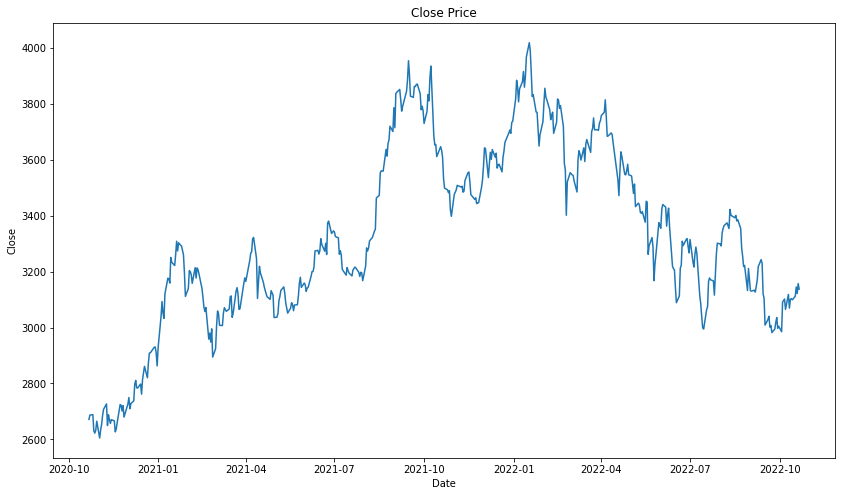

In [29]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(14,8))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Close Price")
plt.plot(df["Close"])

# Zooming In

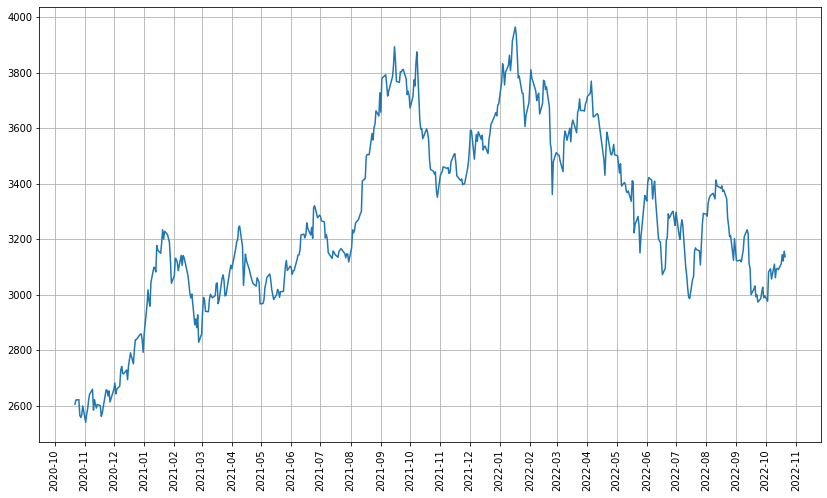

In [49]:
df_tcs = df.loc[pd.Timestamp('2020-10-22'):pd.Timestamp('2022-10-22')]
plt.figure(figsize=(14,8))
plt.plot(df_tcs.index, df_tcs['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Volume')

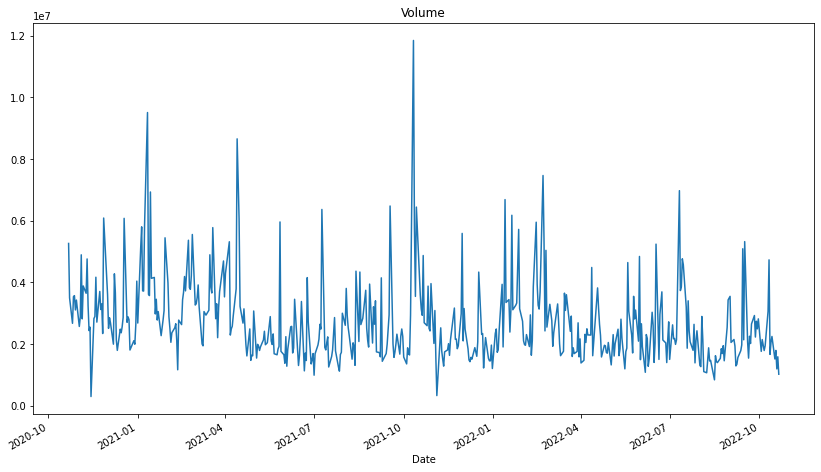

In [54]:
df_tcs['Volume'].plot(label = 'TCS', figsize = (14,8))
plt.title("Volume")

# Moving Average

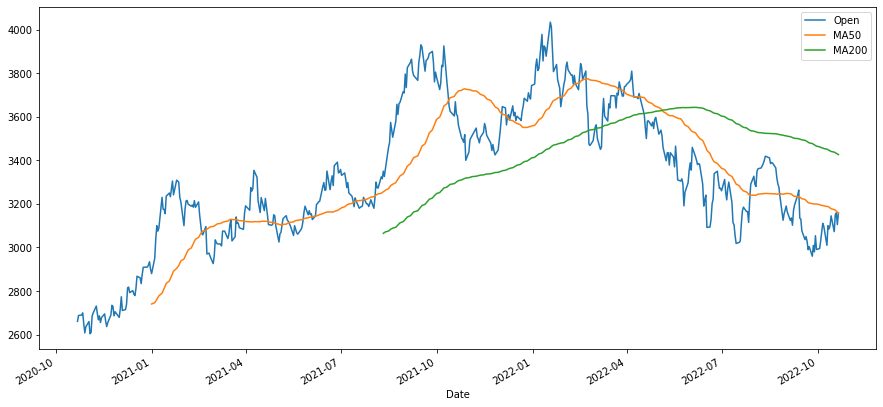

In [61]:
df_tcs['MA50'] = df_tcs['Open'].rolling(50).mean()
df_tcs['MA200'] = df_tcs['Open'].rolling(200).mean()
df_tcs['Open'].plot(figsize = (15,7))
df_tcs['MA50'].plot()
df_tcs['MA200'].plot()
plt.legend()

# Volatility

In [62]:
min_periods = 75 
vol = df_tcs.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.fillna(0,inplace=True)
vol.tail()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,MA50,MA200
Date,,,,,,,,,
2022-10-17,1108.029115,1074.193550,1122.771547,1099.466297,1092.880147,9.448185e+06,2.902493e+10,418.563087,387.134695
2022-10-18,1104.429089,1067.562686,1115.915561,1093.758400,1087.736312,9.462016e+06,2.907505e+10,405.772887,385.647169
2022-10-19,1100.373897,1062.878587,1110.867144,1090.904780,1085.145587,9.522870e+06,2.925614e+10,393.390079,384.297305
2022-10-20,1099.256814,1055.241972,1106.061586,1081.345363,1076.573472,9.515872e+06,2.925363e+10,382.328032,383.120753
2022-10-21,1090.366088,1049.018809,1102.923730,1079.820649,1075.297982,9.598819e+06,2.950329e+10,372.146195,382.164391


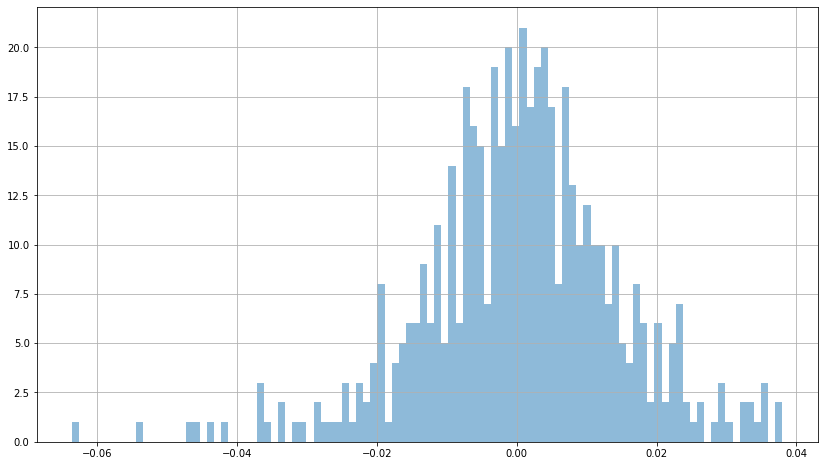

In [64]:
df_tcs['returns'] = (df_tcs['Close']/df_tcs['Close'].shift(1)) -1
df_tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (14,8))